In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the data

In [2]:
df = pd.read_csv('ingredient.csv')

# Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


No missing value

In [4]:
df.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


Min-Max Normalization to reduce bias towards bigger scale

In [5]:
# copy the data 
df_max_scaled = df.copy() 
  
# apply normalization techniques 
for column in df_max_scaled.columns: 
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max() 

In [6]:
df_max_scaled.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.989853,0.771453,0.597891,0.412830,0.963412,0.080041,0.553240,0.055570,0.111783
std,0.001980,0.046985,0.321249,0.142648,0.010271,0.105023,0.087903,0.157847,0.191056
min,0.985149,0.617376,0.000000,0.082857,0.925739,0.000000,0.335392,0.000000,0.000000
25%,0.988652,0.742664,0.471047,0.340000,0.958494,0.019726,0.508956,0.000000,0.000000
50%,0.989406,0.765247,0.775056,0.388571,0.965257,0.089372,0.531192,0.000000,0.000000
75%,0.990370,0.795455,0.801782,0.465714,0.969202,0.098229,0.566553,0.000000,0.196078
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Identify the Anomalies

In [7]:
import statistics
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = statistics.stdev(data)
    random_data_mean = statistics.mean(data)
    # 3-standard deviation
    
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [8]:
#count no of outliers
for i,j in df.items():
    if df[i].dtypes != 'O':
        #make sure it is not object type and apply fillna
        print('Column Name : ', i)
        print('No of outliers : ', len(find_anomalies(df[i].fillna(0))))
        print('Outliers % : ', round(len(find_anomalies(df[i].fillna(0)))/df.shape[0]*100,2))
        #if it is a float type, convert to int
        if df[i].dtypes == 'float64':
            print('Column Name : ', i)
            print('No of outliers : ', len(find_anomalies(df[i].fillna(0).astype(int))))
            print('Outliers % : ', round(len(find_anomalies(df[i].fillna(0).astype(int)))/df.shape[0]*100,2))

Column Name :  a
No of outliers :  3
Outliers % :  1.4
Column Name :  a
No of outliers :  0
Outliers % :  0.0
Column Name :  b
No of outliers :  2
Outliers % :  0.93
Column Name :  b
No of outliers :  2
Outliers % :  0.93
Column Name :  c
No of outliers :  0
Outliers % :  0.0
Column Name :  c
No of outliers :  0
Outliers % :  0.0
Column Name :  d
No of outliers :  3
Outliers % :  1.4
Column Name :  d
No of outliers :  3
Outliers % :  1.4
Column Name :  e
No of outliers :  6
Outliers % :  2.8
Column Name :  e
No of outliers :  4
Outliers % :  1.87
Column Name :  f
No of outliers :  3
Outliers % :  1.4
Column Name :  f
No of outliers :  3
Outliers % :  1.4
Column Name :  g
No of outliers :  7
Outliers % :  3.27
Column Name :  g
No of outliers :  7
Outliers % :  3.27
Column Name :  h
No of outliers :  6
Outliers % :  2.8
Column Name :  h
No of outliers :  3
Outliers % :  1.4
Column Name :  i
No of outliers :  3
Outliers % :  1.4
Column Name :  i
No of outliers :  0
Outliers % :  0.0


# Data Analysis

Correlation

<Axes: >

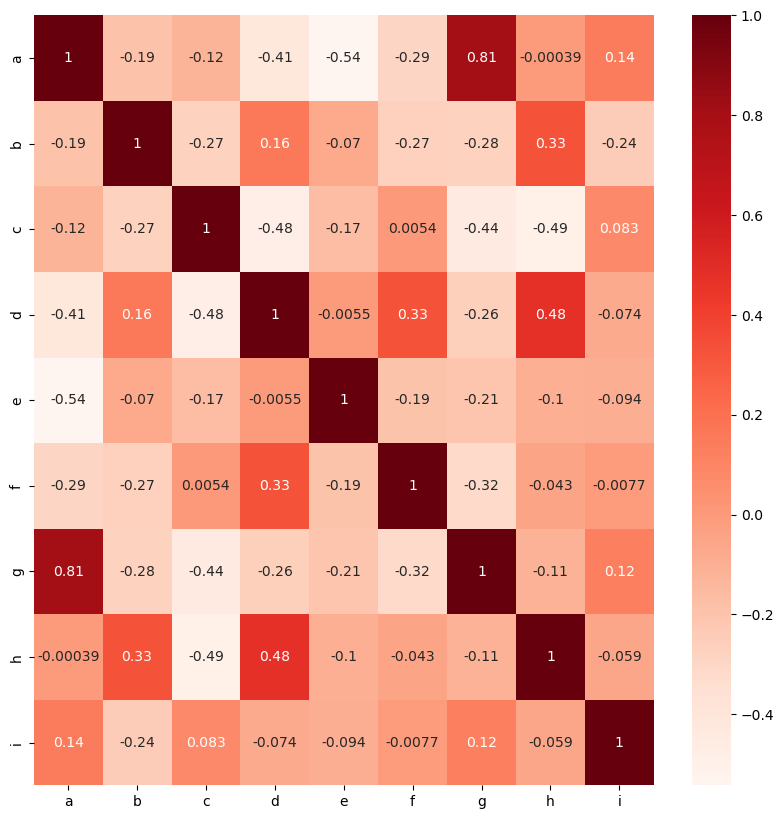

In [9]:
#check the correlation between columns using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df_max_scaled.corr(), cmap='Reds',annot=True)

From the correlation heatmap, additives a & g have very high positive correlation coefficient at 0.81 and additives d & h have medium positive correlation coefficient at 0.48.

# Data Clustering

In [10]:
X = df_max_scaled.values

Attempt 1 : K-Means

B:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
B:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
B:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
B:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avo

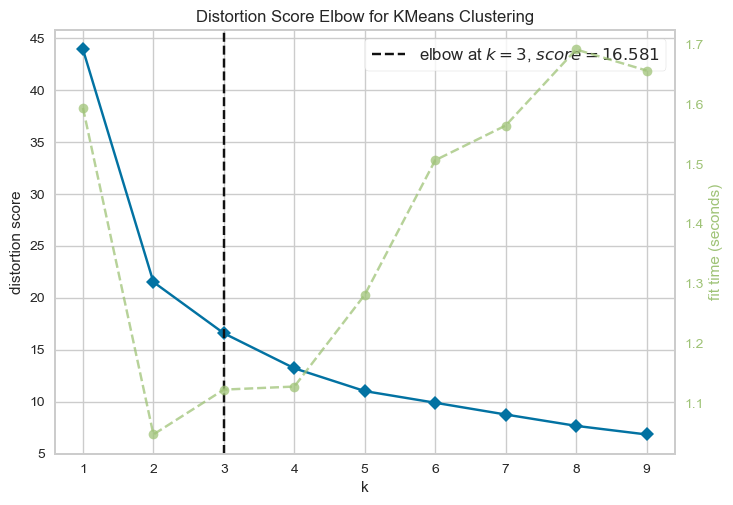

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
# Elbow Method for K means
from sklearn.cluster import KMeans
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,10), timings= True)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [12]:
# Apply KMeans algorithm to the dataset
kmeans = KMeans(n_clusters=3, random_state=None, init='k-means++')
y_kmeans = kmeans.fit_predict(X)

B:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
B:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


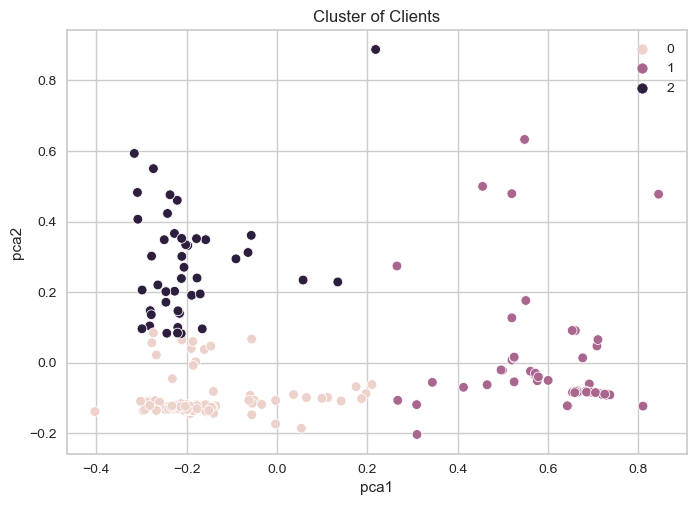

In [13]:
from sklearn.decomposition import PCA
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=y_kmeans, data=results)
plt.title('Cluster of Clients')
plt.show()

Even though Elbow Method suggested 3 clusters, Silhouette suggested 2 clusters as the highest silhouette score

In [14]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
import numpy as np
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=2, random_state=1).fit(X)
labels = kmeans_model.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

B:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
B:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5850847607964761

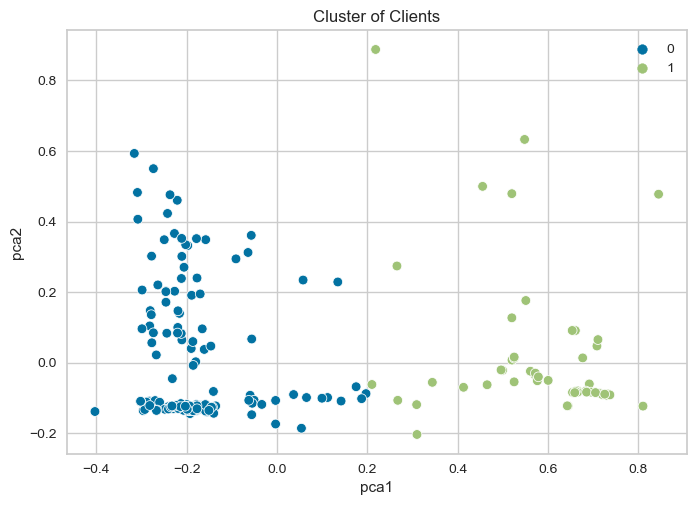

In [15]:
from sklearn.decomposition import PCA
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=labels, data=results)
plt.title('Cluster of Clients')
plt.show()

In [16]:
# Overview of results
def check_result(data):
    """Check results obtained from each algorithm and number of clusters
        data(Dataframe): orgindal dataset + cluster column obtained from algorithm
    """

    fig, axes = plt.subplots(1,2,figsize=(10,4))
    # Count of cluster (countplot)
    sns.countplot(data=data, x='cluster', ax=axes[0], saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
    for container in axes[0].containers:
        axes[0].bar_label(container, label_type="center", padding=5, size=12, color="black", rotation=0,
        bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 2, "alpha": 1})
    # Draw pie plot
    slices = data['cluster'].value_counts().sort_index().values
    activities = [var for var in data['cluster'].value_counts().sort_index().index]
    wedges, texts, autotexts = axes[1].pie(
        slices,
        labels=activities,
        shadow=True,
        autopct='%1.1f%%',
        textprops=dict(size=16, color="black"),
        pctdistance = 0.6,
        radius=1, 
        wedgeprops=dict(edgecolor = "black", linewidth = 2),)

    plt.legend(
        wedges, 
        data.cluster.value_counts().sort_index().index, 
        title="Clusters",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
        edgecolor = "black")


    plt.suptitle(f'Count of Each Cluster', y=1.09)
    plt.show()

In [17]:
kmeans_result_df = pd.concat([df, pd.DataFrame(labels, columns=['cluster'])], axis = 1)

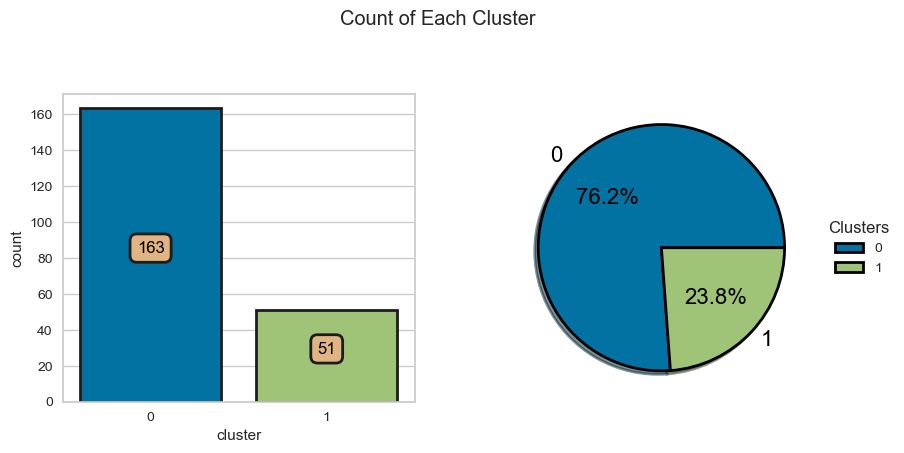

In [18]:
check_result(kmeans_result_df)

The data points are heavily clustered as cluster 0 (can be changed every run but there will be one cluster dominates the other). 

In [19]:
# Check distribution of each cluster
pal = ["#7D1F3F","#303336","#ECE3E2","#D24E49","#B41B10"]
def check_hist(df, name):
    """Check histogram of features in each cluster
        df(Dataframe): orginal dataset + cluster column obtained from model
        name(string): name of model (or algorithm)
        colors(list): list of colors using for palette in plot
    """
    
    plt.figure(figsize=(15, 60), dpi=200)
    for i, col in enumerate(df.iloc[:,:-1], 0):
        for j, clus in enumerate(zip(df.cluster.value_counts().sort_index().index),1):
            plt.subplot(17,int(df.cluster.nunique()),j+i*int(df.cluster.nunique()))
            sns.histplot(df[df.cluster == clus[0]][col],color=pal[j-1], label=f'cluster {clus[0]}', bins=20)
            plt.ylabel("Counts", labelpad=10)
            plt.xlabel(col, labelpad=10)
            plt.legend()
    plt.suptitle(f"Distribution of Features in {name}",y=1)
    plt.tight_layout(pad=3.0)
    plt.show()

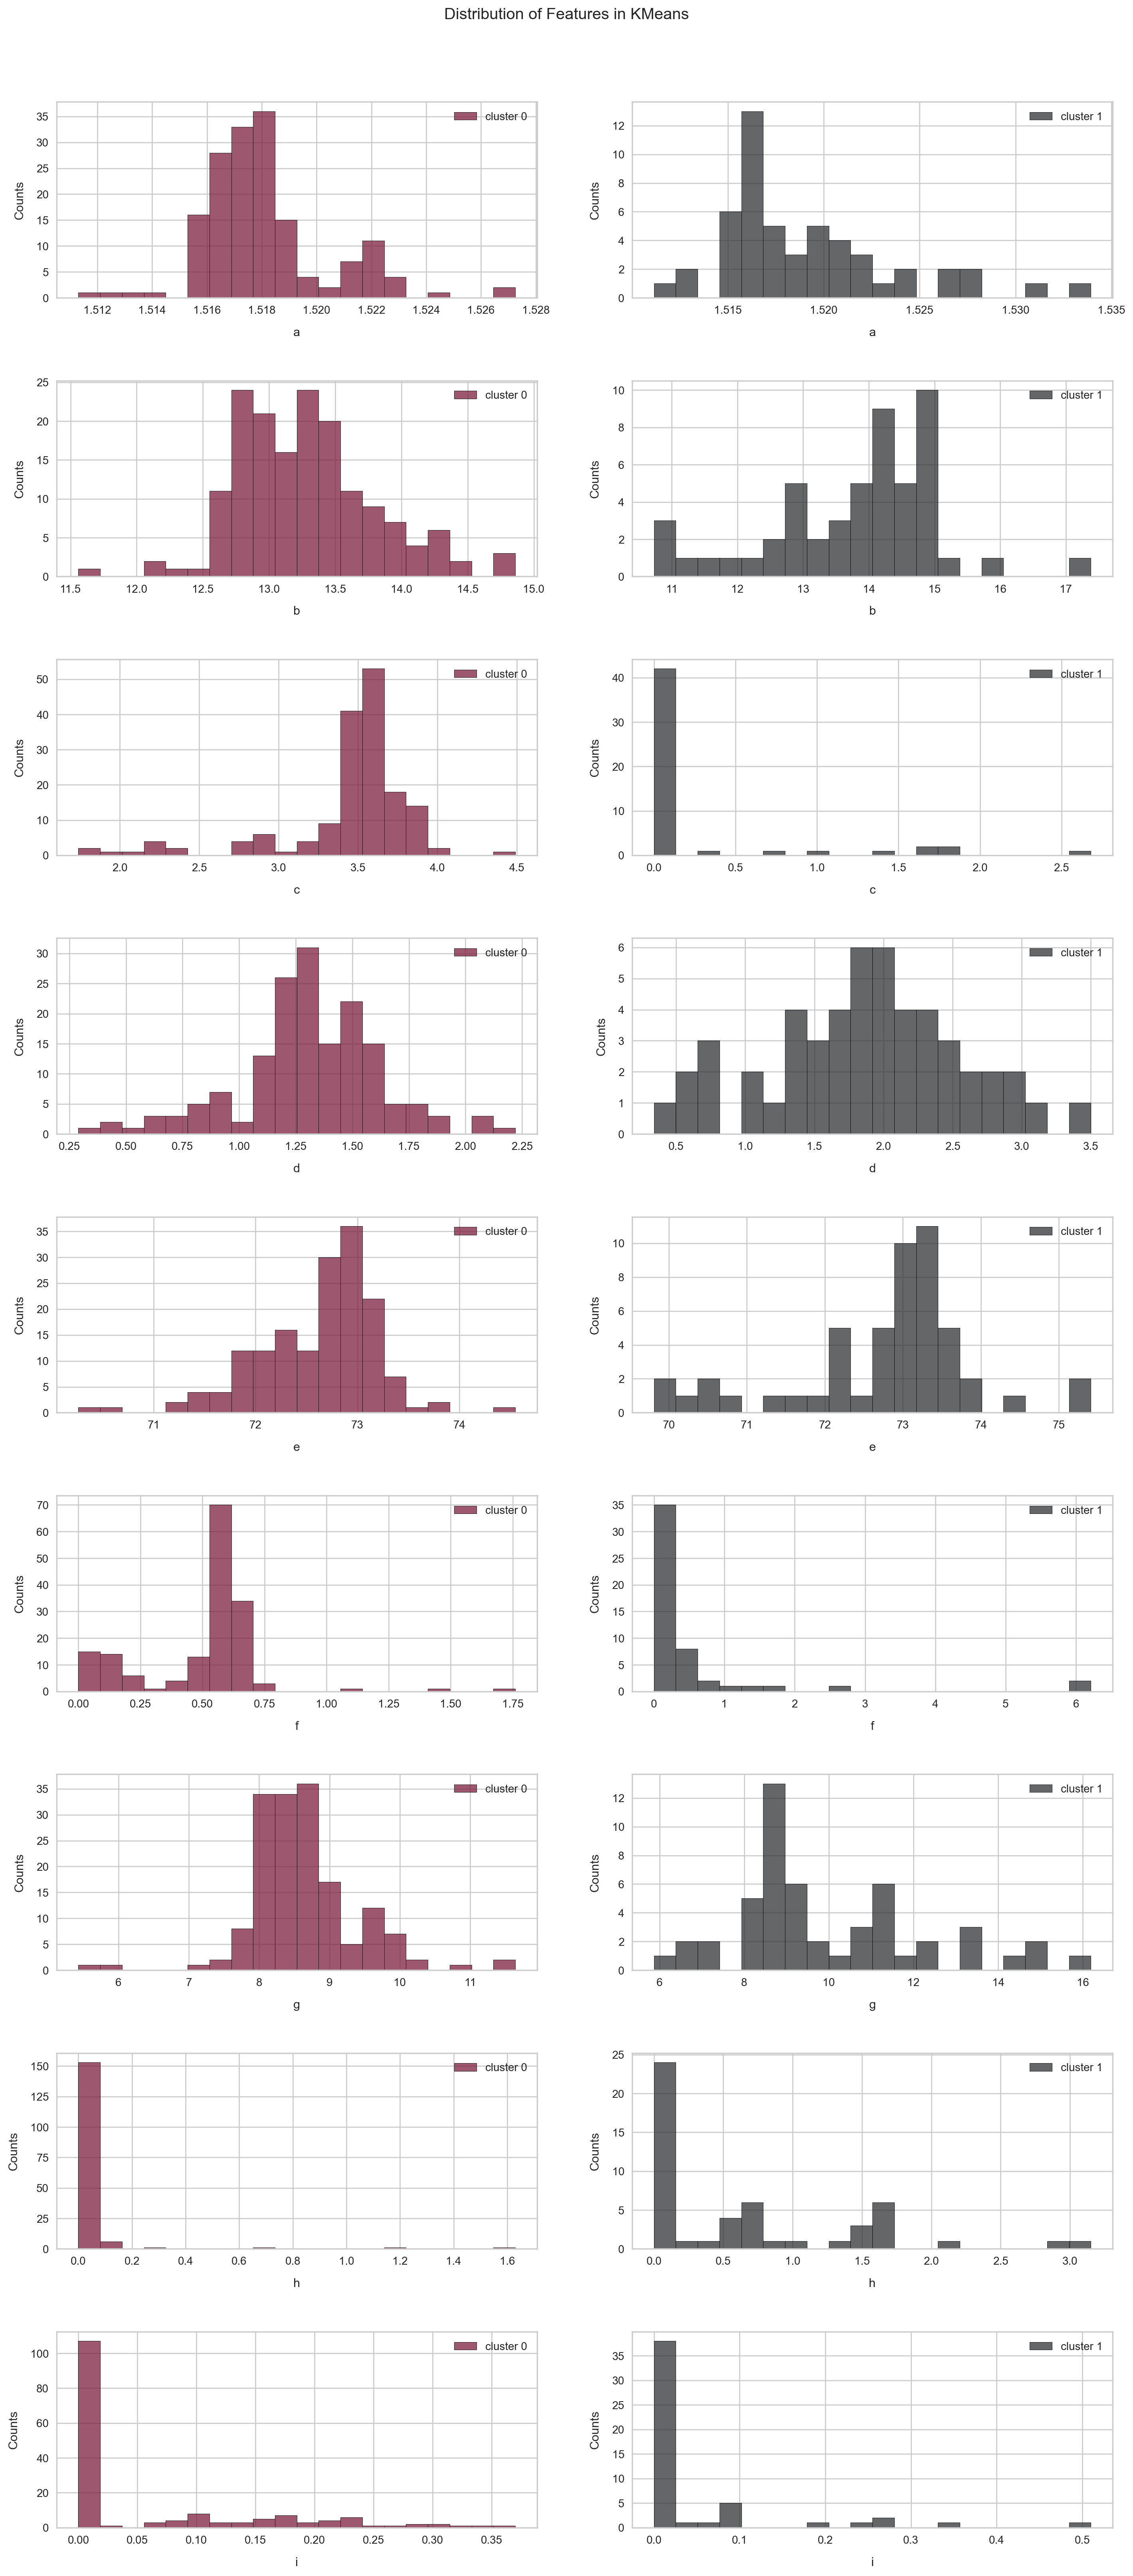

In [20]:
# Implement check_hist fucntion for Kmeans model
check_hist(kmeans_result_df, 'KMeans')

Similar result can be seen when we broke down the distribution into different additives where one cluster dominates the other in terms of number.

B:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


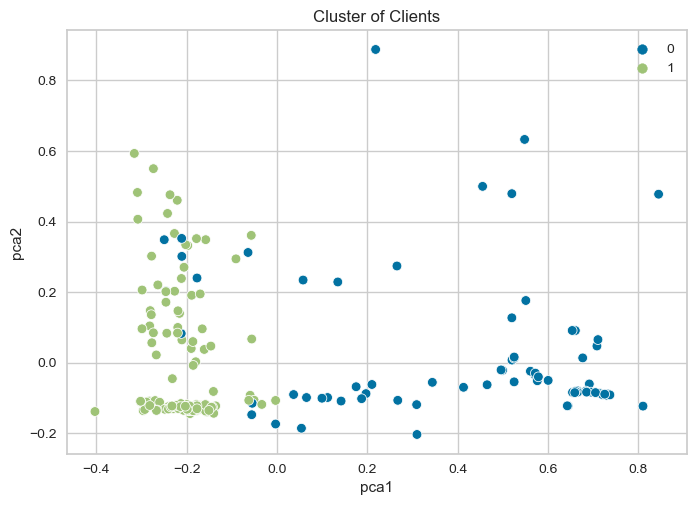

In [25]:
#Gaussian Mixture Model Clustering
from sklearn.mixture import GaussianMixture
# define the model
gaussian_model = GaussianMixture(n_components=2)

# train the model
gaussian_model.fit(X)

# assign each data point to a cluster
gaussian_result = gaussian_model.predict(X)

from sklearn.decomposition import PCA
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=gaussian_result, data=results)
plt.title('Cluster of Clients')
plt.show()

In [26]:
gmm_result_df = pd.concat([df, pd.DataFrame(gaussian_result, columns=['cluster'])], axis = 1)

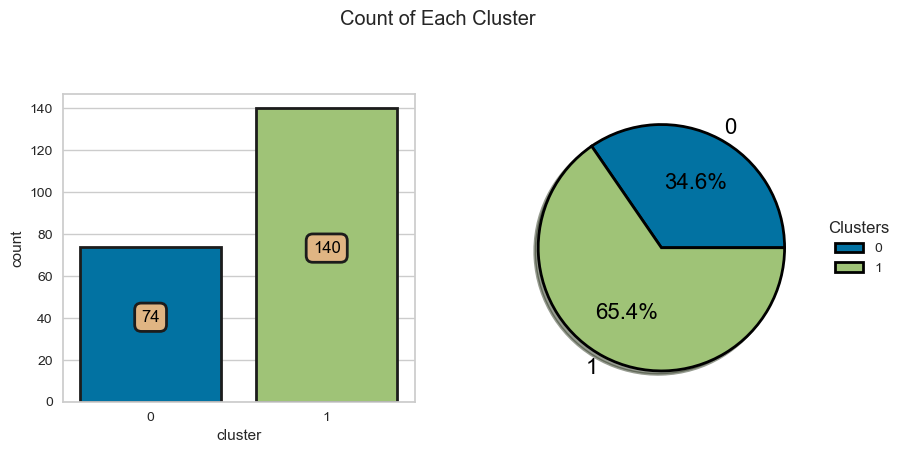

In [27]:
check_result(gmm_result_df)

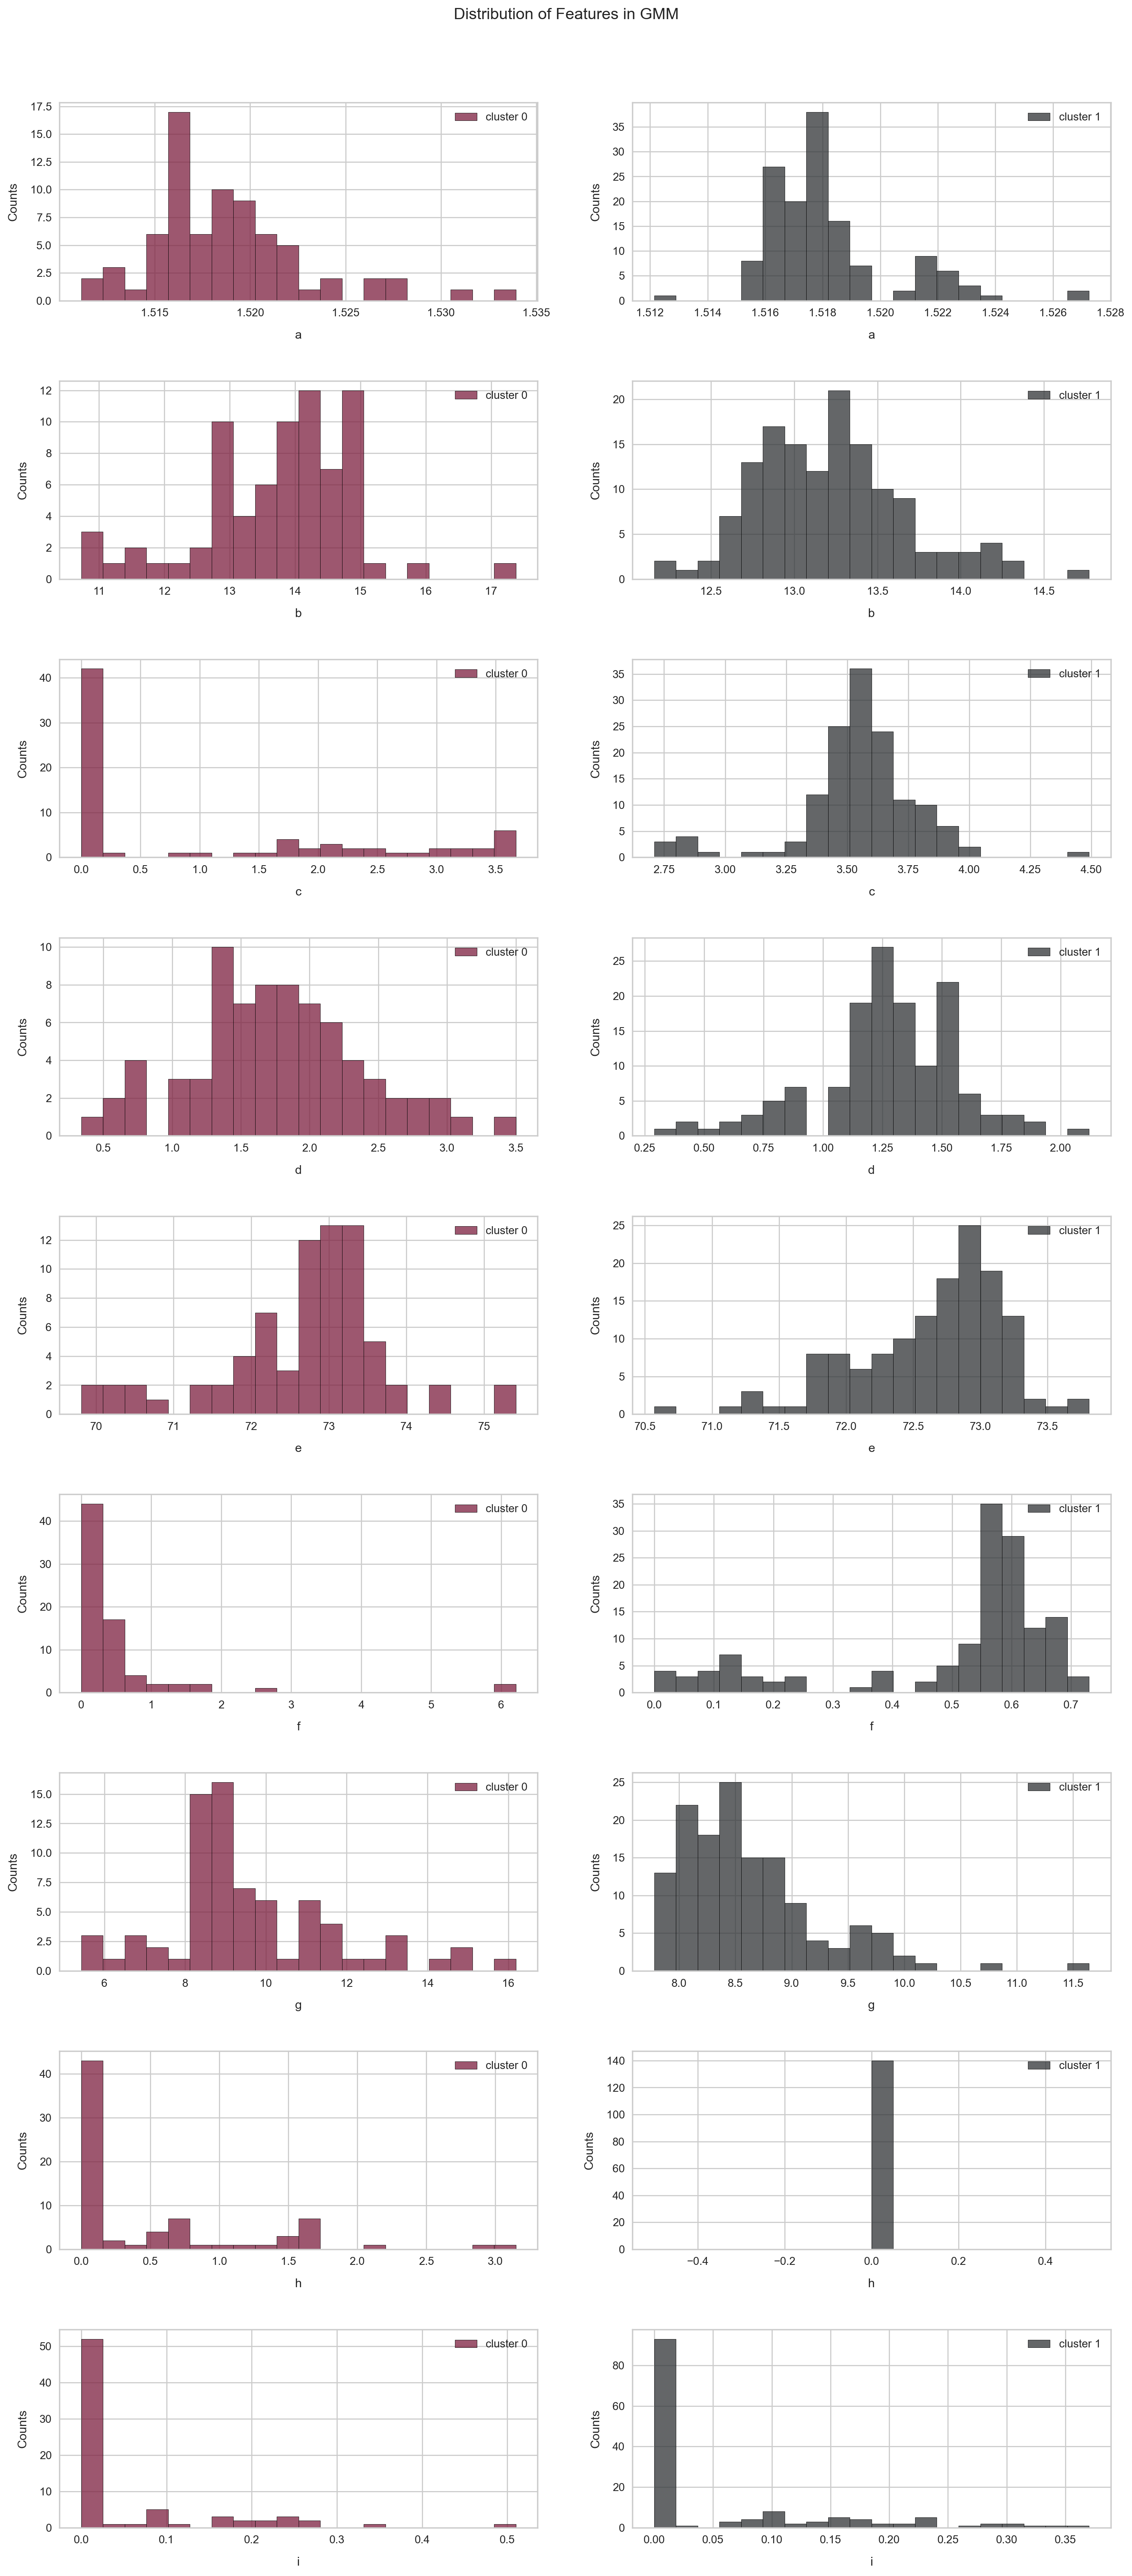

In [28]:
check_hist(gmm_result_df, 'GMM')

GMM shares similar result as K-Means but as it is a soft threshold clustering method, it allows us to see the probability of assigning the data points to their own clusters instead of hard thresholding during the assigning process.

In [30]:
gaussian_proba_result = gaussian_model.predict_proba(X)

In [31]:
gaussian_proba_result

array([[5.44132797e-006, 9.99994559e-001],
       [1.00000000e+000, 0.00000000e+000],
       [4.89925533e-006, 9.99995101e-001],
       [3.54716700e-007, 9.99999645e-001],
       [1.81535542e-006, 9.99998185e-001],
       [1.10898910e-007, 9.99999889e-001],
       [2.55061879e-006, 9.99997449e-001],
       [1.00000000e+000, 0.00000000e+000],
       [8.01588183e-007, 9.99999198e-001],
       [1.02623593e-006, 9.99998974e-001],
       [4.70178200e-007, 9.99999530e-001],
       [9.03625752e-006, 9.99990964e-001],
       [1.00000000e+000, 0.00000000e+000],
       [1.86307179e-006, 9.99998137e-001],
       [9.57021862e-004, 9.99042978e-001],
       [1.00000000e+000, 0.00000000e+000],
       [1.17821772e-004, 9.99882178e-001],
       [8.91318875e-002, 9.10868113e-001],
       [9.99627380e-001, 3.72619549e-004],
       [3.69123005e-008, 9.99999963e-001],
       [9.39387823e-006, 9.99990606e-001],
       [2.00866152e-006, 9.99997991e-001],
       [1.00000000e+000, 0.00000000e+000],
       [9.9

From the number of clusters suggested via Elbow and Silhouette method, the number of formulation can be 2 or 3.